<a href="https://colab.research.google.com/github/kero2no1/data_analytics/blob/working/Data_analytics_outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▼性格診断の回答から性別の特定は可能か？
---


性別と性格には関係性はないように思える。<br>
しかし、"男らしい性格"や"女らしい性格"という言葉が存在することから、<br>
もしかしたら、なんらかの関係性を持つのかもしれない。<br>
<br>
今回は、ビッグファイブ診断の回答結果から、<br>
性別を特定可能かどうかを検証してみることにする。

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# データセットはタブ区切りなのでsepに\tを指定して読み込む
raw_df = pd.read_csv("/content/drive/MyDrive/dataset/BIG5/data.csv", sep="\t")
print(f"データ件数：{raw_df.shape[0]}／列数：{raw_df.shape[1]}")

データ件数：19719／列数：57


In [23]:
print(raw_df.dtypes)

race        int64
age         int64
engnat      int64
gender      int64
hand        int64
source      int64
country    object
E1          int64
E2          int64
E3          int64
E4          int64
E5          int64
E6          int64
E7          int64
E8          int64
E9          int64
E10         int64
N1          int64
N2          int64
N3          int64
N4          int64
N5          int64
N6          int64
N7          int64
N8          int64
N9          int64
N10         int64
A1          int64
A2          int64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
C1          int64
C2          int64
C3          int64
C4          int64
C5          int64
C6          int64
C7          int64
C8          int64
C9          int64
C10         int64
O1          int64
O2          int64
O3          int64
O4          int64
O5          int64
O6          int64
O7          int64
O8          int64
O9        





*   country以外は数値データである
*   race  : 人種
*   age   : 年齢(13歳以上である)
*   engnat   : 母国語は英語か
*   gender  : 性別
*   hand   : 利き手
*   source   : オンライン診断にアクセスした手段
*   country   : オンライン診断にアクセスした国(ISOコード)
*   E1～O10はリッカート尺度(1:Disagree, 3:Neutral, 5:Agree)の診断項目





In [24]:
print(raw_df.describe(exclude="number"))
print("countryの欠損",raw_df["country"].isnull().sum(),"件")

       country
count    19710
unique     158
top         US
freq      8753
countryの欠損 9 件


In [25]:
# 統計量の確認と入力ミスの確認
lists = ["race","age","engnat","gender","hand","source"]
print(raw_df[lists].describe())
print()
for col in lists:
  print(col,"入力ミス",(raw_df[col]==0).sum(),"件")

               race           age        engnat        gender          hand  \
count  19719.000000  1.971900e+04  19719.000000  19719.000000  19719.000000   
mean       5.324205  5.076703e+04      1.365130      1.616918      1.130128   
std        4.019064  7.121272e+06      0.488796      0.499122      0.413663   
min        0.000000  1.300000e+01      0.000000      0.000000      0.000000   
25%        3.000000  1.800000e+01      1.000000      1.000000      1.000000   
50%        3.000000  2.200000e+01      1.000000      2.000000      1.000000   
75%        8.000000  3.100000e+01      2.000000      2.000000      1.000000   
max       13.000000  1.000000e+09      2.000000      3.000000      3.000000   

            source  
count  19719.00000  
mean       1.95228  
std        1.50477  
min        1.00000  
25%        1.00000  
50%        1.00000  
75%        2.00000  
max        5.00000  

race 入力ミス 153 件
age 入力ミス 0 件
engnat 入力ミス 70 件
gender 入力ミス 24 件
hand 入力ミス 100 件
source 入力ミス 0 件


<Axes: xlabel='gender', ylabel='count'>

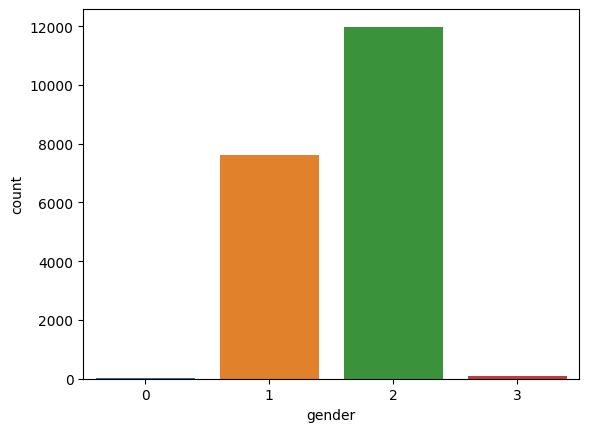

In [40]:
import seaborn as sns
sns.countplot(x="gender", data=raw_df)

<Axes: xlabel='race', ylabel='count'>

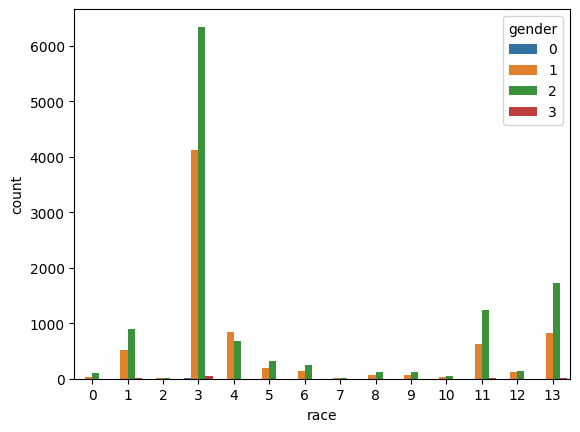

In [41]:
sns.countplot(x="race", hue="gender", data=raw_df)

<Axes: xlabel='engnat', ylabel='count'>

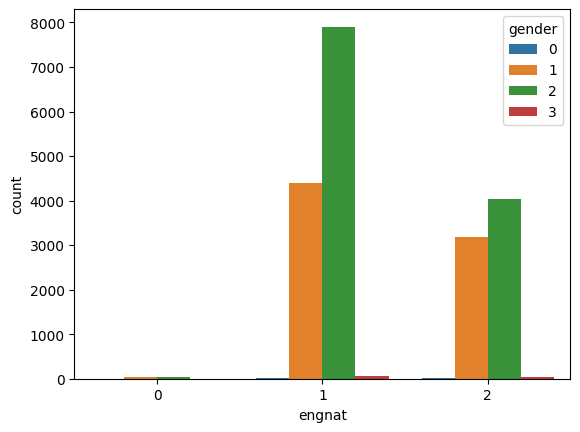

In [39]:
sns.countplot(x="engnat", hue="gender", data=raw_df)

<Axes: xlabel='hand', ylabel='count'>

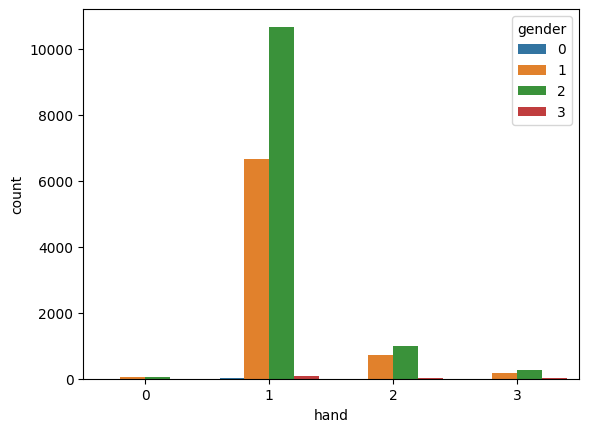

In [42]:
sns.countplot(x="hand", hue="gender",data=raw_df)

<Axes: xlabel='source', ylabel='count'>

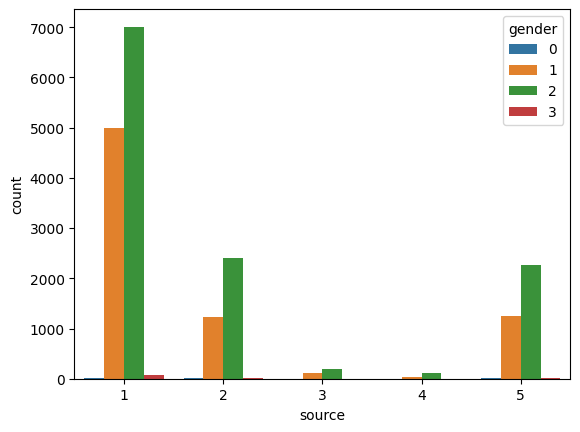

In [43]:
sns.countplot(x="source", hue="gender",data=raw_df)

In [27]:
# 診断項目(回答は1～5で、0はミス)
# 0があるかチェック
for cat in ["E","N","A","C","O"]:
  col_list = [cat+str(idx) for idx in range(1,11)]
  for col in col_list:
    print(col, (raw_df[col] == 0).sum())

E1 1
E2 1
E3 1
E4 1
E5 1
E6 1
E7 1
E8 1
E9 1
E10 1
N1 1
N2 1
N3 1
N4 1
N5 1
N6 1
N7 1
N8 1
N9 1
N10 1
A1 1
A2 1
A3 1
A4 1
A5 1
A6 1
A7 1
A8 1
A9 1
A10 1
C1 1
C2 1
C3 1
C4 1
C5 1
C6 1
C7 1
C8 1
C9 1
C10 1
O1 1
O2 1
O3 1
O4 1
O5 1
O6 1
O7 1
O8 1
O9 1
O10 1


In [28]:
print(raw_df[raw_df["E1"] == 0])

       race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  \
19064    13   52       2       2     1       2      IN   0   0   0  ...   0   

       O2  O3  O4  O5  O6  O7  O8  O9  O10  
19064   0   0   0   0   0   0   0   0    0  

[1 rows x 57 columns]




> 正しく回答されていないレコードが1件だけ存在する。<br>
> このレコードは削除することにする。



In [29]:
raw_df.drop(index=19064,inplace=True)
print(f"データ件数：{raw_df.shape[0]}／列数：{raw_df.shape[1]}")

データ件数：19718／列数：57


In [30]:
# 診断項目(1～5)
for cat in ["E","N","A","C","O"]:
  col_list = [cat+str(idx) for idx in range(1,11)]
  print(raw_df[col_list].describe())

                 E1            E2            E3            E4            E5  \
count  19718.000000  19718.000000  19718.000000  19718.000000  19718.000000   
mean       2.629070      2.759864      3.416929      3.152196      3.432397   
std        1.232454      1.313704      1.236612      1.222647      1.281803   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      3.000000      2.000000      2.000000   
50%        3.000000      3.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 E6            E7            E8            E9           E10  
count  19718.000000  19718.000000  19718.000000  19718.000000  19718.000000  
mean       2.452734      2.867431      3.376661      3.094431      3.585506  
std        1.241524      1.431704      1.266200      1

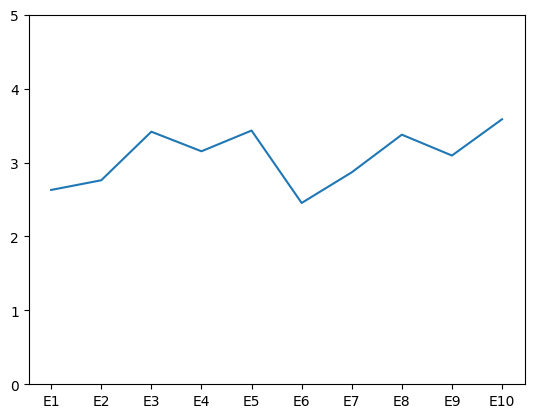

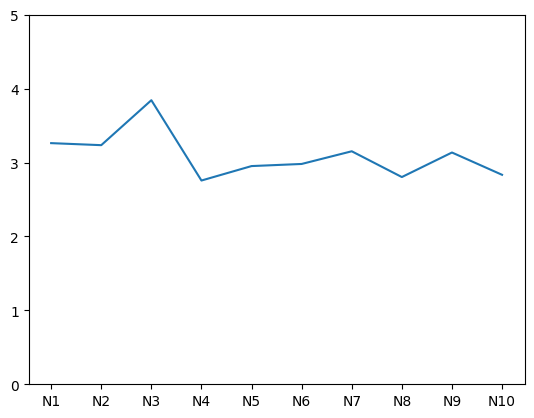

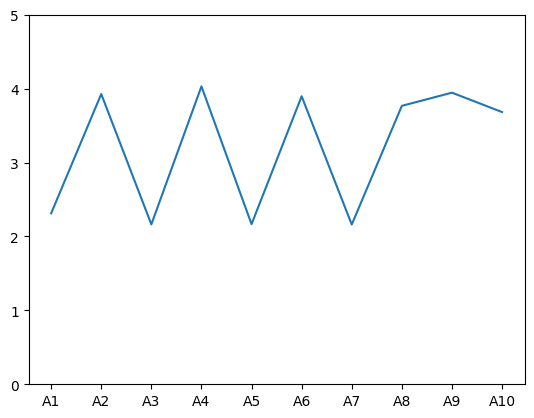

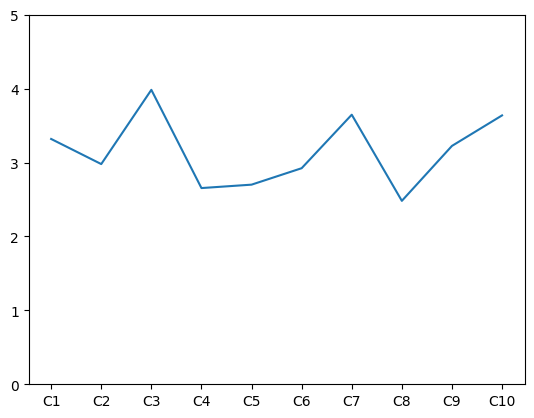

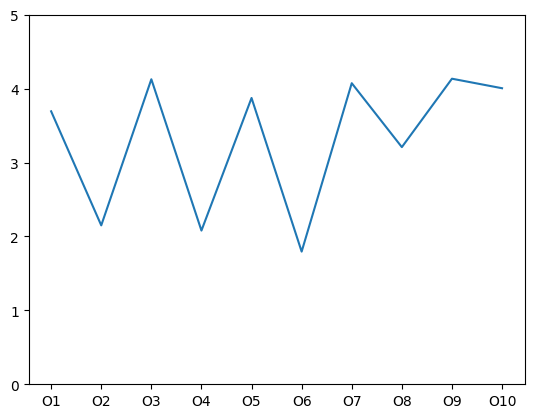

In [31]:
# 診断項目
for cat in ["E","N","A","C","O"]:
  col_list = [cat+str(idx) for idx in range(1,11)]
  x = [label for label in col_list]
  y = [raw_df[label].mean() for label in col_list]
  plt.plot(x, y)
  plt.ylim(0,5)
  plt.show()



> インデントされたブロック



In [32]:
print(raw_df.describe(exclude="number"))
print("countryの欠損",raw_df["country"].isnull().sum(),"件")

       country
count    19709
unique     158
top         US
freq      8753
countryの欠損 9 件


In [33]:
print(raw_df.isnull().sum())

race       0
age        0
engnat     0
gender     0
hand       0
source     0
country    9
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
N10        0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
O1         0
O2         0
O3         0
O4         0
O5         0
O6         0
O7         0
O8         0
O9         0
O10        0
dtype: int64
